In [8]:
#In general plots would look nicer with shorter periods of time. 
# below plots were completed.
#The temperature
#The mean temperature each day
#The mean temperature for each month
#The Windspeed (there is data missing from this column)
#The max windspeed for each day
#I added a dropna at the beguinning.
# I didnt do plots The rolling windspeed (say over 24 hours) and The monthly mean of the daily max windspeeds (yer I am being nasty here)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
#loading the csv file. remove the first 23 lines to prevent errors. I was getting some messages after  upload the cvs file with Low_memory=False I force the data processing library to load the data into memory all at once 
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, header=0,low_memory=False)
#Remove all the NAN
df.dropna(how='all', inplace=True)


In [40]:
# convert date in column in objects with the requested format
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y %H:%M")
df.set_index('date', inplace=True)

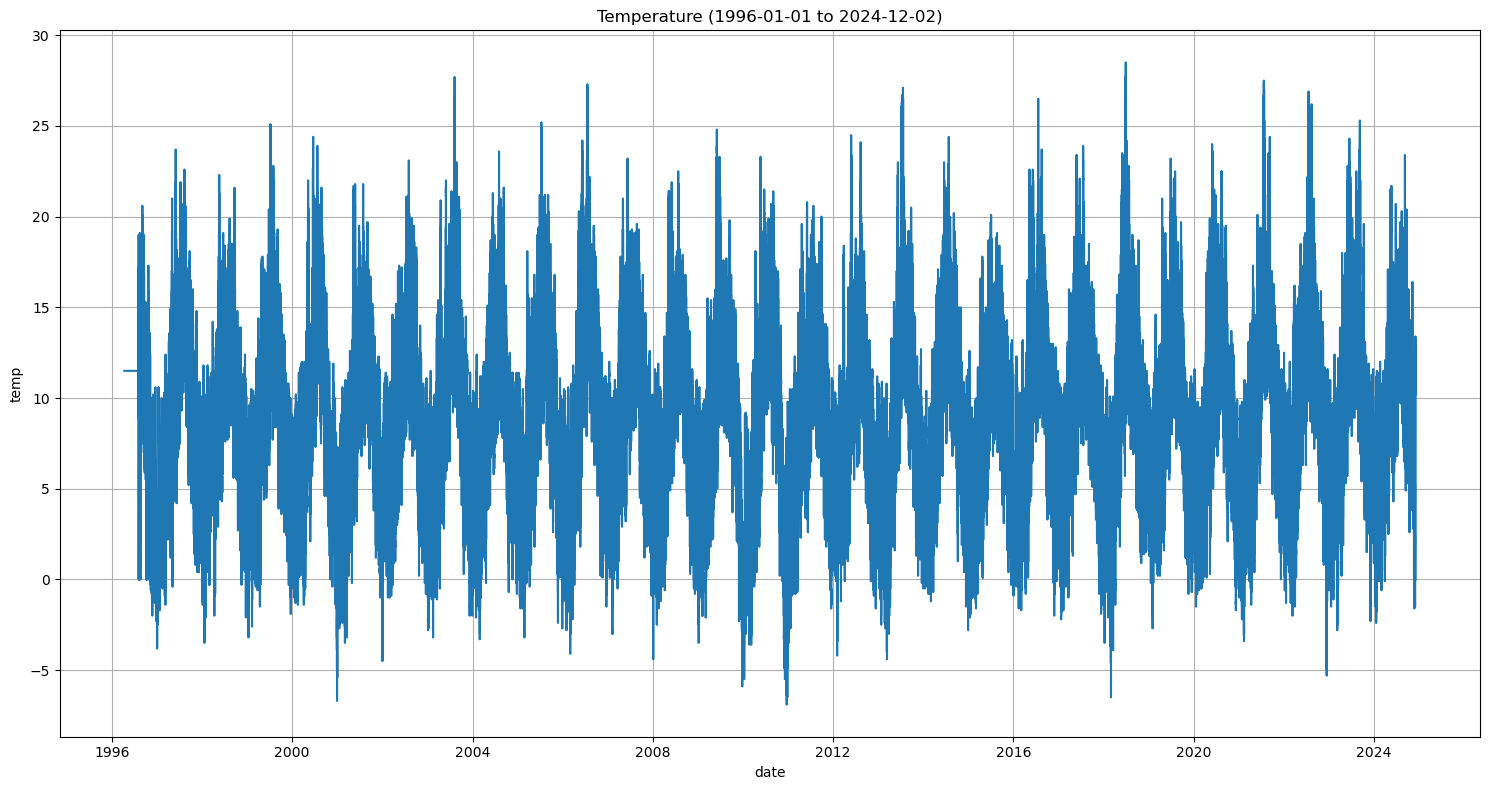

In [42]:
# First plot: temperature
# Define the start date of the range
dateFrom = "1996-01-01 01:00:00"
# Define the end date of the range
dateTo = "2024-12-02 01:00:00"
# Filter the DataFrame to include rows within the specified date range
df_range = df.loc[dateFrom:dateTo]
plt.figure(figsize=(15, 8))
#plot with seaborn
temperature= sns.lineplot(df_range, x="date", y="temp")

plt.title('Temperature (1996-01-01 to 2024-12-02)')
# Format the x-axis to show only the year
plt.grid(True)
plt.tight_layout()  
plt.show()

In [7]:
#This sets the 'date' column as the index, replacing the default integer index.
df.set_index('date', inplace=True)

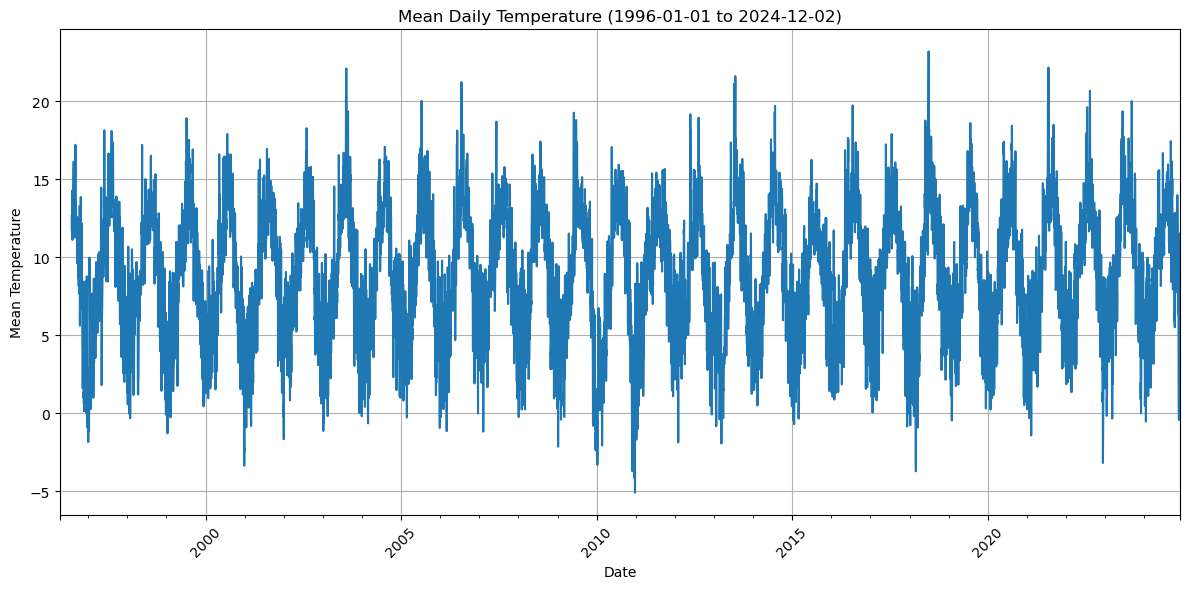

In [44]:
# Plot 2: The mean temperature each day
dateFrom = "1996-01-01 01:00:00"
dateTo = "2024-12-02 01:00:00"
df_range = df.loc[dateFrom:dateTo]
#this section will calculate the daily mean of the 'temp' column. Resample is used in pandas to change frecuency in the time series data. We need daily
daily_mean_temp = df_range['temp'].resample('D').mean()
plt.figure(figsize=(12, 6))
daily_mean_temp.plot()
plt.title('Mean Daily Temperature (1996-01-01 to 2024-12-02)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


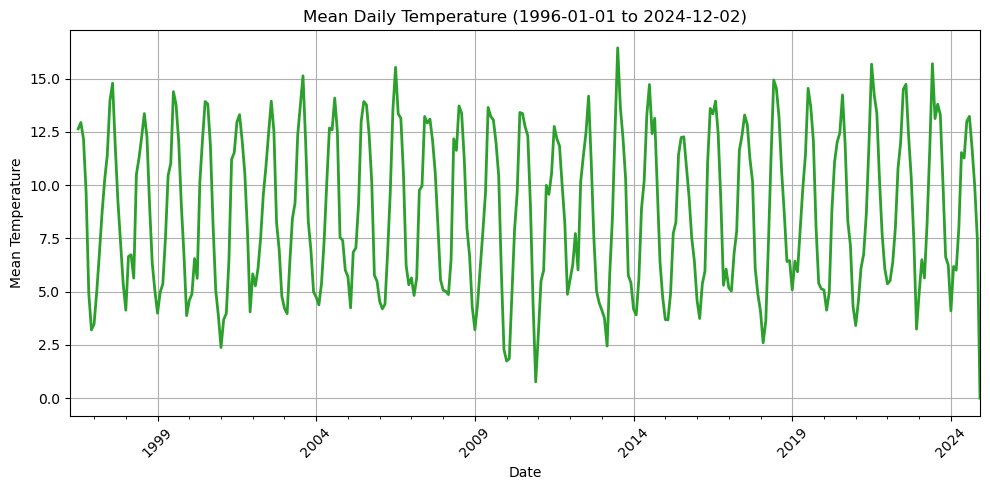

In [9]:
#Plot 3: The mean temperature for each month
#Using resample again but replacing D for M
dateFrom = "1996-01-01 01:00:00"
dateTo = "2024-12-02 01:00:00"
df_range = df.loc[dateFrom:dateTo]
daily_mean_temp = df_range['temp'].resample('M').mean()
plt.figure(figsize=(10, 5))
daily_mean_temp.plot(linewidth=2, color='tab:green')
plt.title('Mean Daily Temperature (1996-01-01 to 2024-12-02)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

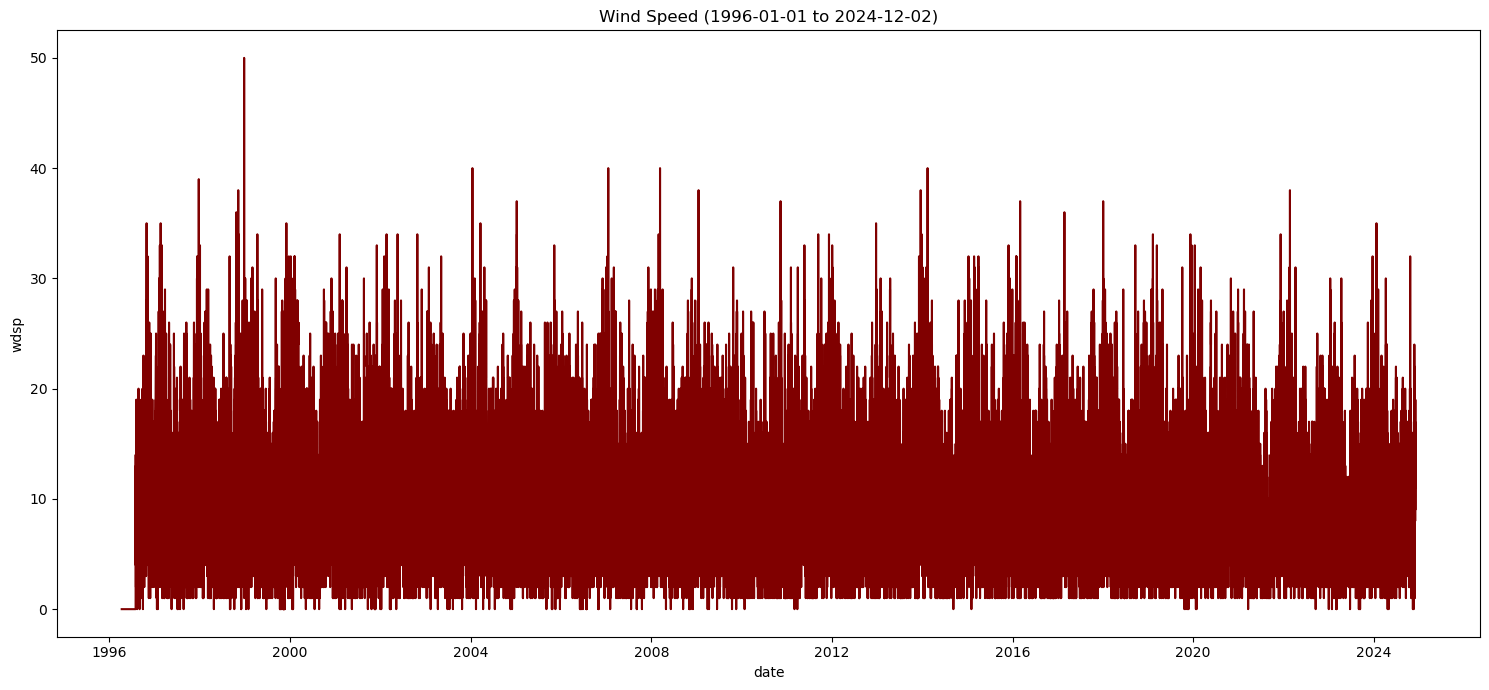

In [45]:
#Plot 4: The Windspeed (there is data missing from this column)
#NA was already dropped.

dateFrom = "1996-01-01 01:00:00"
dateTo = "2024-12-02 01:00:00"
df_range = df.loc[dateFrom:dateTo]

#I was getting errors of mix types. With this code I fix it.
df_range['wdsp'] = pd.to_numeric(df_range['wdsp'], errors='coerce')

plt.figure(figsize=(15, 7))
wind_speed = sns.lineplot(data=df_range, x="date", y="wdsp", color = 'maroon')
plt.title('Wind Speed (1996-01-01 to 2024-12-02)')
plt.tight_layout()
plt.show()

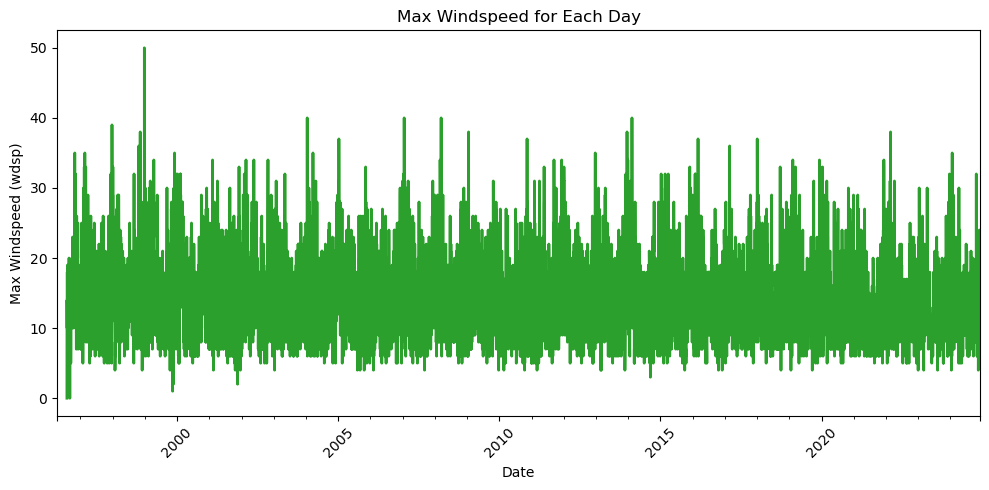

In [ ]:
#Plot 5: The max windspeed for each day. It looks much nicer with shorter periods

dateFrom = "1996-01-01 01:00:00"
dateTo = "2024-12-02 01:00:00"
df_range = df.loc[dateFrom:dateTo]
df_range['wdsp'] = pd.to_numeric(df_range['wdsp'], errors='coerce')

#when running de code I was getting mix type error for long time. to fix the situation I needed to sue pd.to_numeric
# after adding the piece of code it started to work. 

wind_speed_max= df_range['wdsp'].resample('D').max()
plt.figure(figsize=(10, 5))
wind_speed_max.plot(linewidth=2, color='tab:green')
plt.title('Max Windspeed for Each Day')
plt.xlabel('Date')
plt.ylabel('Max Windspeed (wdsp)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()